In [1]:
import pandas as pd
import numpy as np
import scimap as sm
import warnings
warnings.filterwarnings("ignore")

Running SCIMAP  2.3.5


/Users/arojhada/anaconda3/envs/scimap2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



# Download data and prepare the anndata object

In [ ]:
sm.hl.downloadDemoData('../')

# Provide the path to the single-cell feature table. Note that you can specify multiple paths as a list.
feature_table_path = ["../scimapExampleData/quantification/exemplar-001--unmicst_cell.csv"]

# create the annData object
adata = sm.pp.mcmicro_to_scimap(feature_table_path)

Loading exemplar-001--unmicst_cell.csv


# Cluster the data

## Leiden

In [3]:
adata = sm.tl.cluster(adata, method='leiden', resolution=0.3, use_raw=False, log=False) # You can experiment with different resolution parameters and see if that makes sense

Leiden clustering


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [4]:
adata.obs['leiden'].value_counts()

leiden
0    3524
1    2448
2    1798
3    1300
4     844
5     791
6     415
7      81
Name: count, dtype: int64

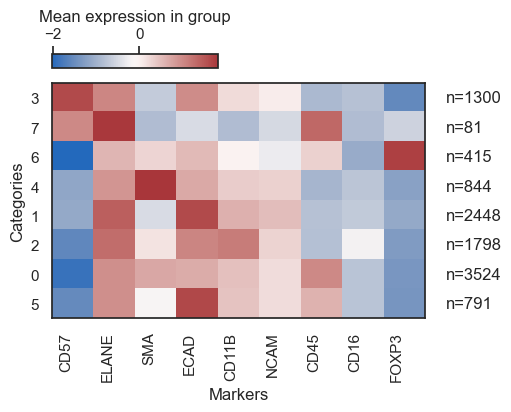

In [5]:
sm.pl.heatmap(adata, groupBy='leiden', standardScale='column', figsize=(5,4), showPrevalence=True)

In [6]:
rename_dict = {'Tumor': ['5','1'],
               'Myeloid': ['2'],
               'Treg': ['6'],
               'Vessels': ['4'],
               'Artifacts': ['7'],
                'Immune': ['3','0']}

adata = sm.hl.rename(adata, rename=rename_dict, from_column='leiden', to_column='leiden_phenotype')

Renaming 5 to Tumor
Renaming 1 to Tumor
Renaming 2 to Myeloid
Renaming 6 to Treg
Renaming 4 to Vessels
Renaming 7 to Artifacts
Renaming 3 to Immune
Renaming 0 to Immune


## You can also experiment with Phenograph if you want

# Inspect annotations on a dotplot

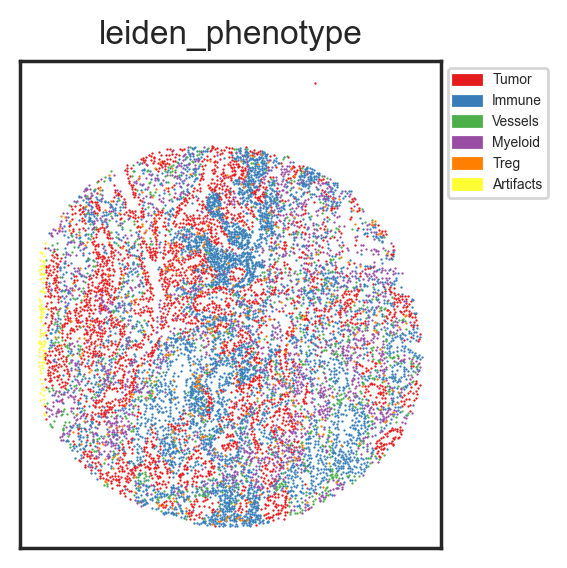

In [7]:
sm.pl.spatial_scatterPlot (adata, colorBy = ['leiden_phenotype'],figsize=(3,3), s=0.7, fontsize=5, catCmap='Set1')

# Inspect annotations on the real images

In [8]:
image_path = '../scimapExampleData/registration/exemplar-001.ome.tif'
seg_mask = '../scimapExampleData/segmentation/unmicst-exemplar-001/cell.ome.tif'

# view in napari
sm.pl.image_viewer(image_path=image_path, 
                   adata=adata, 
                   overlay='leiden_phenotype', 
                   point_size=10,
                   point_color='white',
                   seg_mask=seg_mask)

NameError: name 'napari' is not defined

# Save the adata object

In [9]:
adata.write_h5ad('../cells_annotated.h5ad')